In [2]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.rcParams['text.usetex'] = True
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.sans-serif'] = 'stix'
import sympy
sympy.init_printing()
from scipy import integrate

### Documentación

**`%matplotlib inline`**: Permite que los gráficos generados con `matplotlib` se muestren directamente en el notebook, sin necesidad de abrir una ventana externa.

**`%config InlineBackend.figure_format='retina'`**: Mejora la resolución de las figuras al establecer el formato de las imágenes en "retina" (2x resolución). 

**Configuraciones en `mpl.rcParams`**:
   - **`mpl.rcParams['mathtext.fontset'] = 'stix'`**: Configura `matplotlib` para usar el conjunto de fuentes STIX para símbolos matemáticos, mejorando la apariencia y consistencia de las ecuaciones en los gráficos.
   - **`mpl.rcParams['font.family'] = 'serif'` y `mpl.rcParams['font.sans-serif'] = 'stix'`**: Establecen el tipo de fuente global para las gráficas. La fuente "serif" y el conjunto STIX permiten que los gráficos tengan una apariencia similar a los documentos científicos.

**`from scipy import integrate`**: Importa el submódulo `integrate` de `scipy`, que incluye funciones para realizar integraciones numéricas y otros cálculos avanzados relacionados. Es útil para resolver problemas de integración en ciencia e ingeniería.


## Oscilador armónico

In [3]:
t, omega0 = sympy.symbols("t, omega_0", positive=True) #Declaracion de variables
gamma = sympy.symbols("gamma", complex=True) #Hago que gamma sea un valor algebraico y 
                                            #activo que pueda ser complejo

In [4]:
x = sympy.Function("x") # Defino a x como funcion

In [5]:
ode = x(t).diff(t, 2) + 2 * gamma * omega0 * x(t).diff(t) + omega0**2 * x(t) #defino la ED

In [6]:
ode #Muestro la ED

In [7]:
ode_sol = sympy.dsolve(ode) #Resuelvo la ED

In [9]:
ode_sol #Muestro la solución

In [10]:
ics = {x(0): 1, x(t).diff(t).subs(t, 0): 0}

### Documentación

`ics` es un diccionario que se utiliza para definir **condiciones iniciales** en ecuaciones diferenciales:

```python
ics = {x(0): 1, x(t).diff(t).subs(t, 0): 0}
```

Argumentos de la función:
- `x(0): 1` indica que el valor de la función \( x(t) \) en \( t = 0 \) es igual a 1, es decir, \( x(0) = 1 \).
- `x(t).diff(t).subs(t, 0): 0` indica que la derivada de \( x(t) \) con respecto a \( t \), evaluada en \( t = 0 \), es igual a 0, es decir, \( x'(0) = 0 \).

In [11]:
ics

In [12]:
def apply_ics(sol, ics, x, known_params):
    """
    Apply the initial conditions (ics), given as a dictionary on
    the form ics = {y(0): y0: y(x).diff(x).subs(x, 0): yp0, ...}
    to the solution of the ODE with indepdendent variable x.
    The undetermined integration constants C1, C2, ... are extracted
    from the free symbols of the ODE solution, excluding symbols in
    the known_params list.
    """
    free_params = sol.free_symbols - set(known_params)
    eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(ics)
           for n in range(len(ics))]
    sol_params = sympy.solve(eqs, free_params)
    return sol.subs(sol_params)

### Documentación

La función `apply_ics`, funciona para aplicar **condiciones iniciales** a una solución simbólica de una ecuación diferencial, ajustando los **parámetros libres** para que la solución cumpla con dichas condiciones.

### Argumentos de la función
- `sol`: la solución simbólica de la ecuación diferencial, en forma de una igualdad, que puede incluir parámetros desconocidos.
- `ics`: un diccionario de condiciones iniciales, donde las claves son las evaluaciones de la función o sus derivadas en puntos específicos, y los valores son los valores deseados.
- `x`: la variable independiente de la solución (por ejemplo, \( t \) en el caso de \( x(t) \)).
- `known_params`: un conjunto de parámetros que se consideran conocidos, es decir, que no se ajustarán para cumplir con las condiciones iniciales.

**Identificar los parámetros libres**:
   ```python
   free_params = sol.free_symbols - set(known_params)
   ```
   `free_params` se define como el conjunto de símbolos libres en `sol` (parámetros desconocidos en la ecuación) que no están en `known_params`. Estos serán los parámetros que el código intentará determinar.

**Crear ecuaciones para las condiciones iniciales**:
   ```python
   eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(ics)
           for n in range(len(ics))]
   ```
   Esta línea genera una lista `eqs` de ecuaciones al derivar ambos lados de `sol` hasta el orden de cada condición inicial en `ics`. Luego, evalúa estas derivadas en \( x = 0 \) (o en el punto de condición inicial) y sustituye las condiciones iniciales.

**Resolver los parámetros desconocidos**:
   ```python
   sol_params = sympy.solve(eqs, free_params)
   ```
   Esta línea usa `sympy.solve` para resolver las ecuaciones en `eqs`, encontrando valores de `free_params` que cumplen con las condiciones iniciales.

**Sustituir los parámetros en la solución**:
   ```python
   return sol.subs(sol_params)
   ```
   Finalmente, sustituye los valores encontrados para `free_params` en la solución `sol`, retornando una solución ajustada que cumple con las condiciones iniciales especificadas en `ics`.

### Aplicación
Si se tiene una solución simbólica de una ecuación diferencial que incluye parámetros libres (como \( C_1 \), \( C_2 \), etc.) y se desea encontrar valores específicos de estos parámetros para que la solución cumpla con ciertas condiciones iniciales. Esta función permite hacer eso de forma automatica.

In [18]:
x_t_sol = apply_ics(ode_sol, ics, t, [omega0, gamma]) 

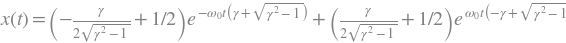

In [20]:
x_t_sol #Muestro la solucion en base a las condiciones iniciales y constantes o prametros fijos

In [21]:
x_t_critical = sympy.limit(x_t_sol.rhs, gamma, 1)

In [22]:
x_t_critical

### Documentación

las funciones anteriores se utilizan para ajustar una solución de una ecuación diferencial con condiciones iniciales y luego analizar su comportamiento en un caso particular (límite crítico). 

```python
x_t_sol = apply_ics(ode_sol, ics, t, [omega0, gamma])
```

Esta línea llama a la función `apply_ics` para obtener una **solución particular** de la ecuación diferencial, utilizando las condiciones iniciales (`ics`) y la solución general (`ode_sol`). Aquí:
- `ode_sol` es la solución general de la ecuación diferencial.
- `ics` contiene las condiciones iniciales.
- `t` es la variable independiente (el tiempo, en este caso).
- `[omega0, gamma]` son parámetros conocidos en la solución, que **no se ajustarán**.

Después de aplicar la función `apply_ics`, la variable `x_t_sol` contiene la solución particular que cumple con las condiciones iniciales.

```python
x_t_critical = sympy.limit(x_t_sol.rhs, gamma, 1)
```

Esta función calcula el **límite crítico** de la solución `x_t_sol` cuando el parámetro `gamma` tiende a 1. Los argumentos de la función refieren a:
- `x_t_sol.rhs` representa el lado derecho de la ecuación (`rhs` se refiere a "right-hand side").
- `sympy.limit` calcula el límite de `x_t_sol.rhs` al acercarse `gamma` a 1.


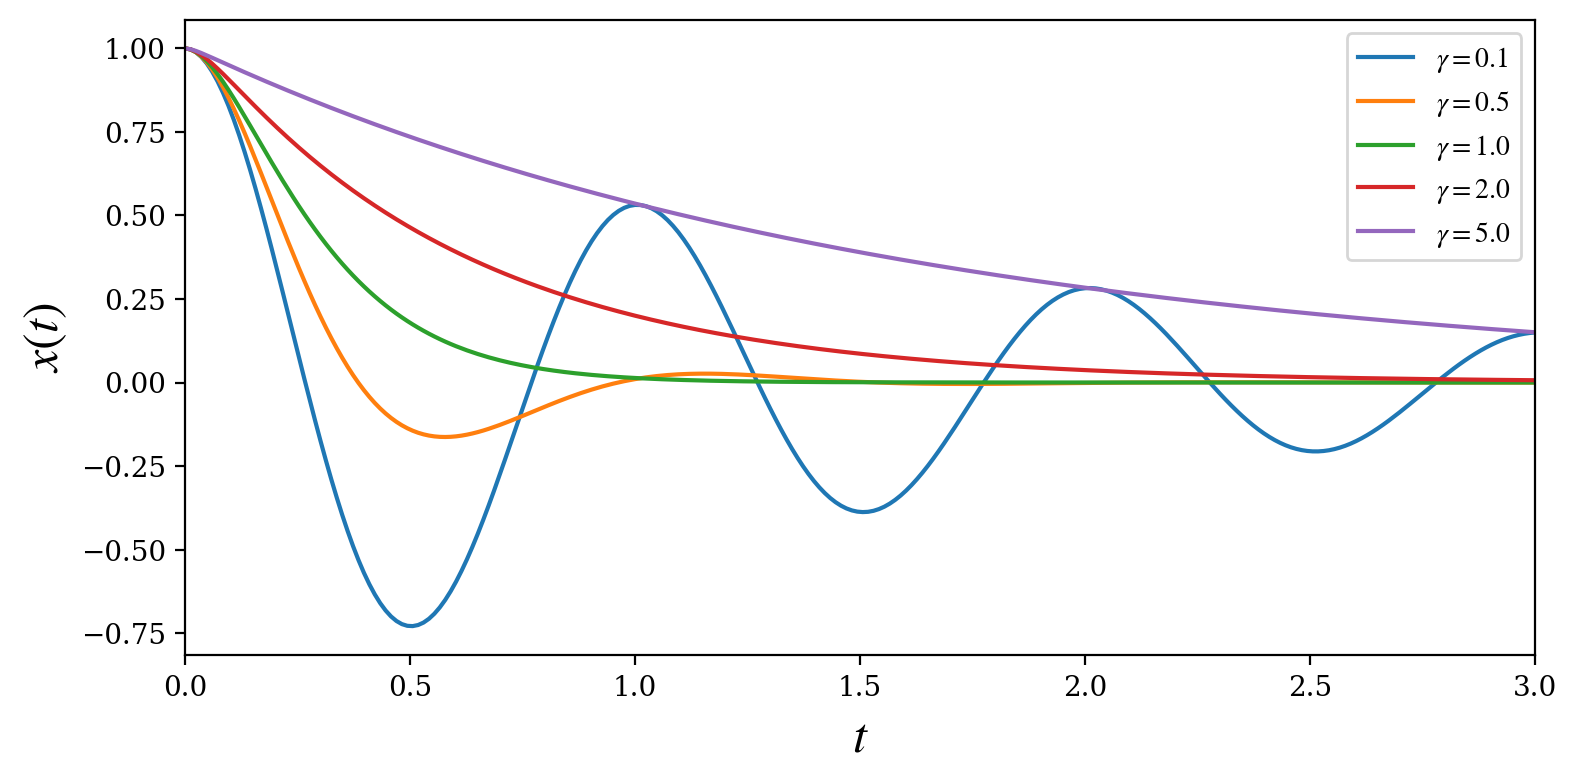

In [17]:
fig, ax = plt.subplots(figsize=(8, 4))

tt = np.linspace(0, 3, 250)
for g in [0.1, 0.5, 1, 2.0, 5.0]:
    if g == 1:
        x_t = sympy.lambdify(t, x_t_critical.subs({omega0: 2.0 * sympy.pi}), 'numpy')
    else:
        x_t = sympy.lambdify(t, x_t_sol.rhs.subs({omega0: 2.0 * sympy.pi, gamma: g}), 'numpy')
    ax.plot(tt, x_t(tt).real, label=r"$\gamma = %.1f$" % g)

ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x(t)$", fontsize=18)
ax.set_xlim(0, 3)
ax.legend()

fig.tight_layout()
#fig.savefig('harmonic-oscillator.pdf')

### Documentación

El codigo anterior genera una **gráfica** de la solución \( x(t) \) de una ecuación diferencial para distintos valores de un parámetro \( \gamma \).

```python
fig, ax = plt.subplots(figsize=(8, 4))
```
- Crea una figura (`fig`) y un conjunto de ejes (`ax`) usando `plt.subplots`. El parámetro `figsize=(8, 4)` define el tamaño de la figura en pulgadas (8 de ancho y 4 de alto).

```python
tt = np.linspace(0, 3, 250)
```
- Genera un conjunto de 250 puntos equiespaciados entre 0 y 3 usando `np.linspace`. Esta es la variable de tiempo (`tt`) para la cual se evaluará \( x(t) \) y se graficará.

```python
for g in [0.1, 0.5, 1, 2.0, 5.0]:
```
- Inicia un bucle `for` que itera sobre diferentes valores de \( \gamma \) (0.1, 0.5, 1, 2.0, 5.0). Esto permite comparar la solución \( x(t) \) para diferentes valores de este parámetro.

```python
    if g == 1:
        x_t = sympy.lambdify(t, x_t_critical.subs({omega0: 2.0 * sympy.pi}), 'numpy')
    else:
        x_t = sympy.lambdify(t, x_t_sol.rhs.subs({omega0: 2.0 * sympy.pi, gamma: g}), 'numpy')
```
- **Condicional**: si \( g = 1 \), utiliza `x_t_critical`, que es la solución en el caso crítico cuando \( \gamma = 1 \). Si \( g \) es distinto de 1, usa `x_t_sol`, que es la solución general de la ecuación diferencial.
- **Subs**: ambas líneas usan `.subs` para reemplazar el valor de \( \omega_0 \) por \( 2\pi \) y (en el caso de `x_t_sol`) el valor de \( \gamma \) por \( g \).
- **Lambdify**: `sympy.lambdify` convierte la expresión simbólica de \( x(t) \) en una función de NumPy, lo que permite evaluar la solución en un arreglo de valores de `tt`.

```python
    ax.plot(tt, x_t(tt).real, label=r"$\gamma = %.1f$" % g)
```
- Traza la solución `x_t(tt).real` para el valor actual de \( \gamma \), agregando una etiqueta `label` con el valor específico de \( \gamma \). La parte `real` se usa en caso de que \( x(t) \) tenga una parte imaginaria (por lo general, en ecuaciones oscilatorias), y solo se grafica la parte real.

```python
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x(t)$", fontsize=18)
```
- Define las etiquetas de los ejes \( t \) y \( x(t) \), con un tamaño de fuente de 18 para mejor legibilidad.

```python
ax.set_xlim(0, 3)
```
- Ajusta el límite del eje \( t \) de 0 a 3.

```python
ax.legend()
```
- Muestra una leyenda que identifica cada curva en la gráfica con su respectivo valor de \( \gamma \).

```python
fig.tight_layout()
```
- Ajusta automáticamente los márgenes de la figura para evitar que las etiquetas se sobrepongan, haciendo que el diseño sea más limpio y organizado.

# **Sistemas de Resorte/ Masa**


Los sistemas de resorte/masa se rigen por la ley de hooke, que establece lo siguiente:

**LEY DE HOOKE**: Suponga que un resorte se suspende verticalmente de un soporte rígido y luego se le fija una masa m a su extremo libre. La cantidad de alargamiento o elongación del resorte depende de la masa; masas con pesos diferentes alargan el resorte en cantidades diferentes. Por la ley de Hooke, el resorte mismo ejerce una fuerza restauradora F opuesta a la dirección de elongación y proporcional a la cantidad de elongación *s* y es expresada en forma simple como $F = ks$, donde *k* es una constante de proporcionalidad llamada constante de resorte.

<div style="text-align: center;">
<img src="Images/1.png" width="300" style="display:inline;">
<img src="Images/2.png" width="285" style="display:inline;">
</div>

#### *Movimiento armonico simple o movimiento libre no amortiguado*

Este movimiento se rige por la Ecuación diferencial:
$$\frac{d^2(x)}{dt^2}+\omega^2x=0$$

Con condiciones iniciales  $x(0)=x_0$ y $x'(0)=x_1$

Donde $\omega=\frac{k}{m}$ donde k es la constante de resorte y m la masa que se encuentra suspendida. Veamos como se comporta este movimiento programandolo con las anteriores funciones.

In [40]:
t, omega0 = sympy.symbols("t, omega_0", positive=True)
x = sympy.Function("x") # Defino a x como funcion

In [45]:
ode = x(t).diff(t, 2) + omega0**2 * x(t) #defino la ED

In [46]:
ode

In [47]:

ode_sol = sympy.dsolve(ode) #Resuelvo la ED

In [48]:
ode_sol

Evaluemos ahora las condiciones iniciales: Supongamos que  $x(0)=1$ y $x'(0)=2$

In [49]:
ics = {x(0): 1, x(t).diff(t).subs(t, 0): 2} #colocamos las condiciones iniciales

In [50]:
ics

In [51]:
x_t_sol = apply_ics(ode_sol, ics, t, [omega0]) 

In [52]:
x_t_sol

In [53]:
x_t_critical = sympy.limit(x_t_sol.rhs, omega0, 1)

In [54]:
x_t_critical

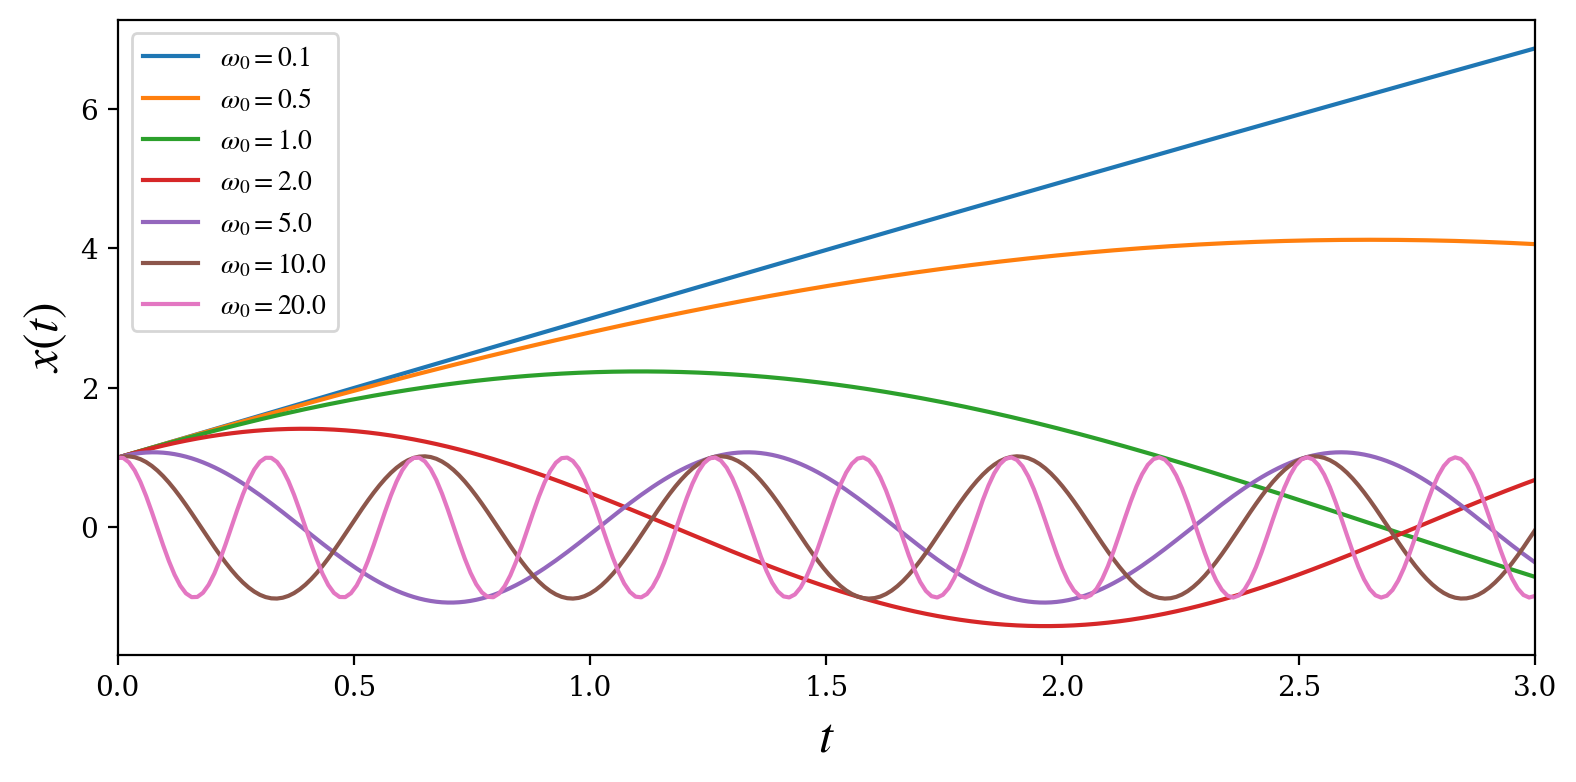

In [63]:
fig, ax = plt.subplots(figsize=(8, 4))

tt = np.linspace(0, 3, 250)
for g in [0.1, 0.5, 1.0, 2.0, 5.0, 10.0,20.0]:
    if g == 1:
        x_t = sympy.lambdify(t, x_t_critical.subs({omega0: g}), 'numpy')
    else:
        x_t = sympy.lambdify(t, x_t_sol.rhs.subs({omega0: g}), 'numpy')
    ax.plot(tt, x_t(tt).real, label=r"$\omega_0 = %.1f$" % g)

ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x(t)$", fontsize=18)
ax.set_xlim(0, 3)
ax.legend()

fig.tight_layout()


Observamos que en la gráfica a medida que $\omega$ aumenta las oscilaciones son mayores. Entonces como $\omega=\frac{k}{m}$, a medida que la constante del resorte $k$ aumenta las oscilaciones tambien aumentan.

#### *Movimiento armonico simple o movimiento libre no amortiguado*


El concepto de movimiento armónico libre es ideal, puesto que el movimiento que describe la ecuación supone que no hay fuerzas retardadoras actuando sobre la masa en movimiento. A menos que la masa se suspenda en un vacío perfecto, habrá por lo menos una fuerza de resistencia debida al medio circundante. La masa podría estar suspendida en un medio viscoso o unida a un dispositivo amortiguador.

Las fuerzas de amortiguamiento que actuan sobre un cuerpo se consideran proporcionales a una potencia de la velocidad instantánea. En particular, en el análisis posterior se supone que esta fuerza está dada por un múltiplo constante de $\frac{dx}{dt}$. Cuando ninguna otra fuerza actua en el sistema, se tiene de la segunda ley de Newton que:
 $$m\frac{d^2x}{dt^2}=-kx-\beta\frac{dx}{dt}$$
donde $\beta$ es una constante de amortiguamiento positiva y el signo negativo es una consecuencia del hecho de que la fuerza de amortiguamiento actúa en una dirección opuesta al movimiento.

<div style="text-align: center;">
<img src="Images/3.png" width="250" style="display:inline;">
<img src="Images/4.png" width="235" style="display:inline;">
</div>